In [1]:
from keras.datasets import mnist
from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization
from keras.models import Model
import keras.backend as K
from keras.utils import to_categorical
import numpy as np
from keras.callbacks import EarlyStopping

In [14]:
from keras.datasets import mnist
# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [15]:
inputs = Input((28, 28, 1))
x = Conv2D(32, (3, 3))(inputs)
x = BatchNormalization()(x)
x = PReLU()(x)
x = Conv2D(32, (3, 3))(x)
x = BatchNormalization()(x)
x = PReLU()(x)
x = Conv2D(64, (5, 5))(x)
x = BatchNormalization()(x)
x = PReLU()(x)
x = Conv2D(64, (5, 5))(x)
x = BatchNormalization()(x)
x = PReLU()(x)
x = Conv2D(128, (7, 7))(x)
x = BatchNormalization()(x)
x = PReLU()(x)
x = Conv2D(128, (7, 7))(x)
x = BatchNormalization()(x)
x = PReLU()(x)
x = Flatten()(x)
x = Dense(2)(x)
out1 = PReLU(name="out1")(x)
out2 = Dense(10, activation="softmax")(out1)

model=Model(inputs,out2)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_24 (PReLU)              │ (None, 26, 26, 32)     │        21,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_25 (PReLU)              │ (None, 24, 24, 32)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_26 (PReLU)              │ (None, 20, 20, 64)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_27 (PReLU)              │ (None, 16, 16, 64)     │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 10, 10, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_28 (PReLU)              │ (None, 10, 10, 128)    │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 128)      │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_29 (PReLU)              │ (None, 4, 4, 128)      │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         4,098 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out1 (PReLU)                    │ (None, 2)              │             

 Total params: 1,470,594 (5.61 MB)

 Trainable params: 1,469,698 (5.61 MB)

 Non-trainable params: 896 (3.50 KB)

In [16]:
from keras.layers import Input, Embedding, Lambda
from keras.models import Model
import keras.backend as K

lambda_c = 1
input_ = Input(shape=(1,))

# Embedding layer
centers = Embedding(10, 2)(input_)


# Lambda layer with explicitly defined output_shape
import tensorflow as tf

# Lambda layer with TensorFlow operations
intra_loss = Lambda(
    lambda x: tf.reduce_sum(tf.square(x[0] - x[1][:, 0]), axis=1, keepdims=True),
    output_shape=(1,)
)([out1, centers])


# Model definition
model_center_loss = Model([inputs, input_], [out2, intra_loss])


# Compile the model
model_center_loss.compile(
    optimizer="sgd",
    loss=["categorical_crossentropy", lambda y_true, y_pred: y_pred],
    loss_weights=[1, lambda_c / 2.],
    metrics=["accuracy", None]
)

# Model summary
model_center_loss.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 26, 26,    │        320 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 26, 26,    │        128 │ conv2d_24[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_24 (PReLU)  │ (None, 26, 26,    │     21,632 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 24, 24,    │      9,248 │ p_re_lu_24[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 24, 24,    │        128 │ conv2d_25[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_25 (PReLU)  │ (None, 24, 24,    │     18,432 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 20, 20,    │     51,264 │ p_re_lu_25[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 20,    │        256 │ conv2d_26[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_26 (PReLU)  │ (None, 20, 20,    │     25,600 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 16, 16,    │    102,464 │ p_re_lu_26[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_27[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_27 (PReLU)  │ (None, 16, 16,    │     16,384 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 10, 10,    │    401,536 │ p_re_lu_27[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 10,    │        512 │ conv2d_28[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_28 (PReLU)  │ (None, 10, 10,    │     12,800 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 4, 4, 128) │    802,944 │ p_re_lu_28[0][0]

 Total params: 1,470,614 (5.61 MB)

 Trainable params: 1,469,718 (5.61 MB)

 Non-trainable params: 896 (3.50 KB)

In [17]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255.
x_test/=255.
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)
print(y_train_one_hot.shape)

(60000, 28, 28, 1)
(60000,)
(60000, 10)


In [18]:
dummy_matrix1=np.zeros((x_train.shape[0],1))
dummy_matrix2=np.zeros((x_test.shape[0],1))

model_center_loss.fit(x=[x_train,y_train],y=[y_train_one_hot,dummy_matrix1],
                     batch_size=512,epochs=100,verbose=1,validation_data=([x_test,y_test],[y_test_one_hot,dummy_matrix2]),
                     callbacks=[EarlyStopping(monitor="val_loss",patience=20)])

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - dense_9_accuracy: 0.1172 - dense_9_loss: 2.2850 - lambda_5_loss: 0.0559 - loss: 2.3129 - val_dense_9_accuracy: 0.0980 - val_dense_9_loss: 2.3025 - val_lambda_5_loss: 0.0016 - val_loss: 2.3033
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - dense_9_accuracy: 0.2497 - dense_9_loss: 2.1510 - lambda_5_loss: 0.1568 - loss: 2.2294 - val_dense_9_accuracy: 0.0982 - val_dense_9_loss: 2.3016 - val_lambda_5_loss: 0.0113 - val_loss: 2.3074
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - dense_9_accuracy: 0.3289 - dense_9_loss: 2.0691 - lambda_5_loss: 0.2115 - loss: 2.1748 - val_dense_9_accuracy: 0.1568 - val_dense_9_loss: 2.2946 - val_lambda_5_loss: 0.0440 - val_loss: 2.3168
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - dense_9_accuracy: 0.3807 - dense_9_loss: 2.0010 - lambda_5_loss: 0.2423 - loss: 2.1221 - val_dense_9_accuracy: 0.2016 - val_dense_9_loss: 2.2442 - val_lambda_5_loss: 0.0678 - val_loss: 2.2783
Epoc

In [20]:
# Create a model that outputs the desired layer's output
layer_name = 'out1'  # Replace with the correct layer name
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the intermediate features
test_features = intermediate_layer_model.predict(x_test)
print(test_features.shape)

# Compute test centers
test_centers = np.dot(np.transpose(y_test_one_hot), test_features)
test_centers_count = np.sum(np.transpose(y_test_one_hot), axis=1, keepdims=True)
test_centers /= test_centers_count
print(test_centers.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
(10000, 2)
(10, 2)


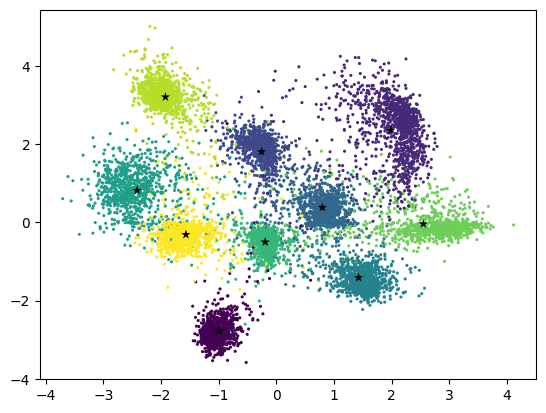

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(test_features[:,0],test_features[:,1],c=y_test,edgecolor="none",s=5)
plt.scatter(test_centers[:,0],test_centers[:,1],c="black",marker="*",edgecolor="none",s=50)
plt.show()